In [1]:
import numpy
import kaggle
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('heemalichaudhari/adidas-sales-dataset', path='./', unzip=True)
# Start reading from row 5 and columns B to N
df = pd.read_excel("Adidas US Sales Datasets.xlsx", sheet_name="Data Sales Adidas", skiprows=range(4), usecols="B:N")
#df = pd.read_excel("Adidas US Sales Datasets.xlsx", sheet_name="Data Sales Adidas", header=4)
#df = df.dropna(axis=1, how='all')

In [4]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [5]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [6]:
# Display basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [7]:
# Get the start date (oldest date)
start_date = df['Invoice Date'].min()

# Get the last date
last_date = df['Invoice Date'].max()

print("Start Date:", start_date)
print("Last Date:", last_date)


Start Date: 2020-01-01 00:00:00
Last Date: 2021-12-31 00:00:00


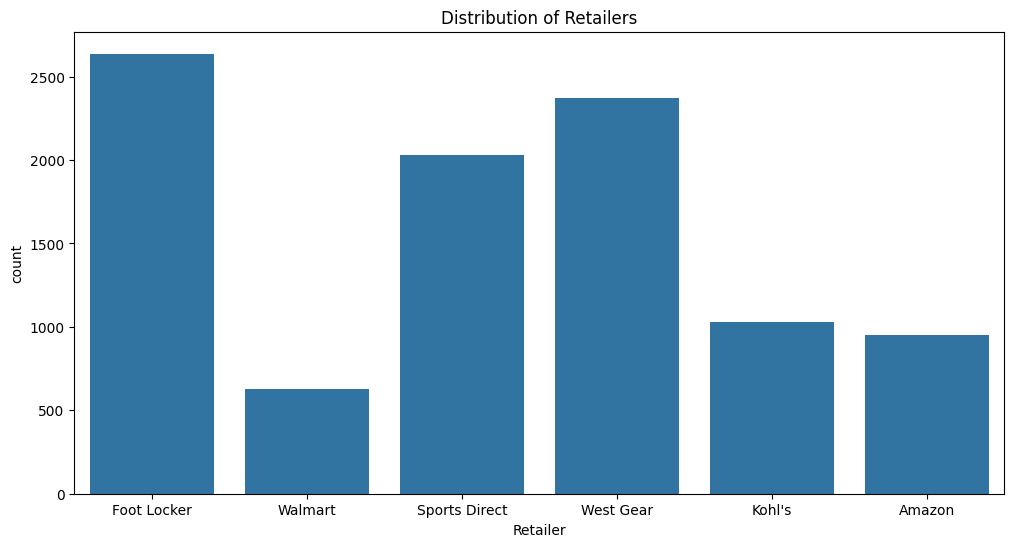

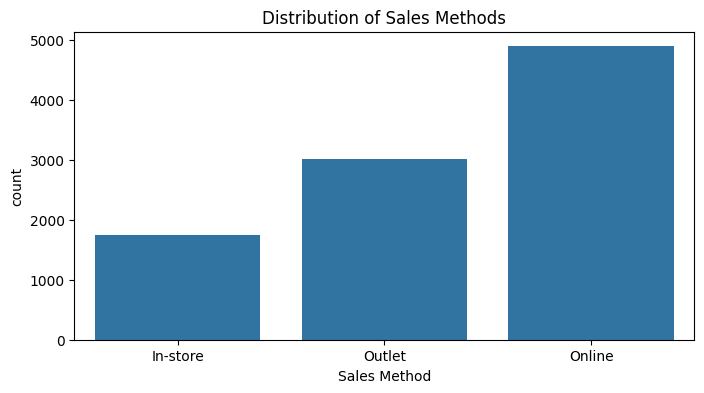

In [8]:
# Countplot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Retailer', data=df)
plt.title('Distribution of Retailers')
plt.show()

# Countplot for Sales Method
plt.figure(figsize=(8, 4))
sns.countplot(x='Sales Method', data=df)
plt.title('Distribution of Sales Methods')
plt.show()


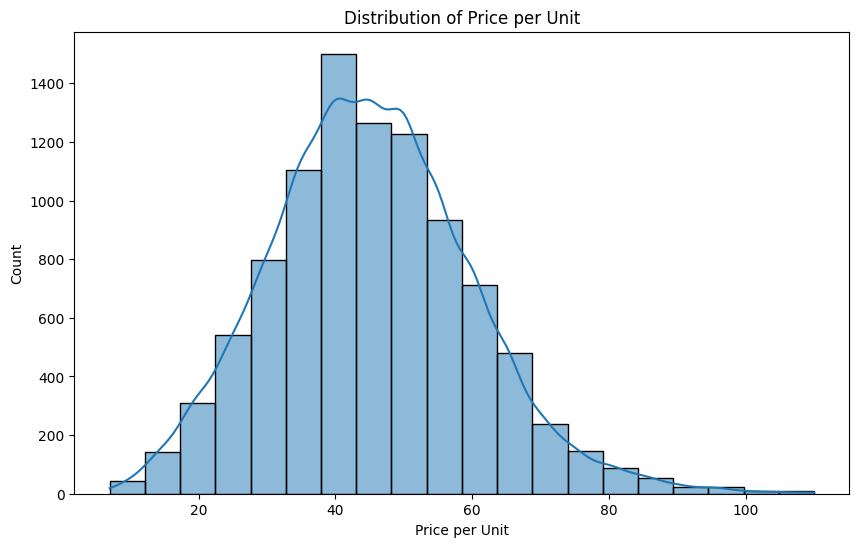

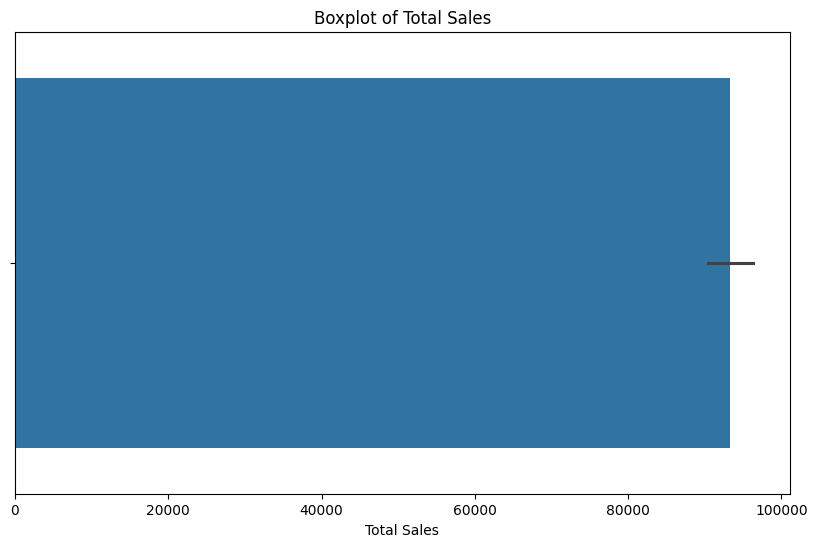

In [9]:
# Histogram for Price per Unit
plt.figure(figsize=(10, 6))
sns.histplot(df['Price per Unit'], bins=20, kde=True)
plt.title('Distribution of Price per Unit')
plt.show()

# Boxplot for Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Sales', data=df)
plt.title('Boxplot of Total Sales')
plt.show()


Rows with non-numeric 'Units Sold':
Empty DataFrame
Columns: [Retailer, Retailer ID, Invoice Date, Region, State, City, Product, Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin, Sales Method]
Index: []

Rows with non-numeric 'Total Sales':
Empty DataFrame
Columns: [Retailer, Retailer ID, Invoice Date, Region, State, City, Product, Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin, Sales Method]
Index: []


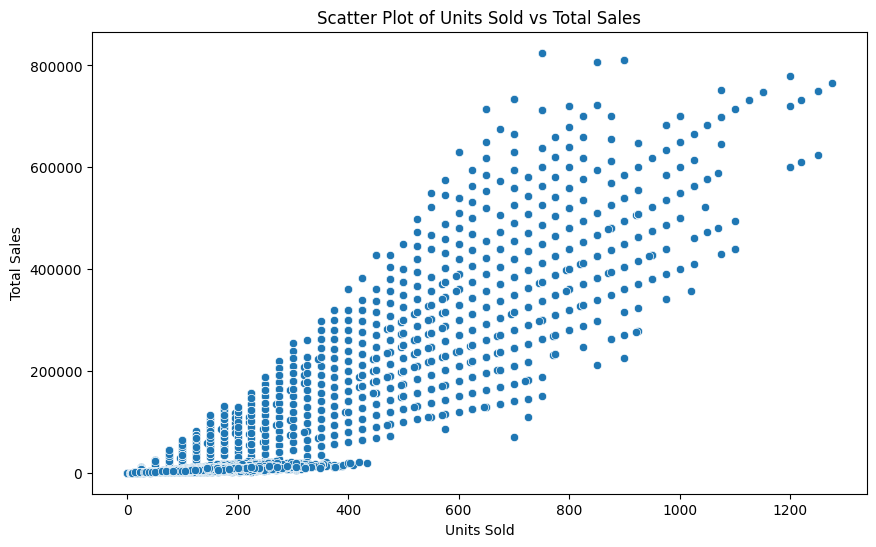

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Convert 'Units Sold' and 'Total Sales' to numeric, coercing errors
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')

# Identify rows with non-numeric values
non_numeric_units_sold = df[df['Units Sold'].isnull()]
non_numeric_total_sales = df[df['Total Sales'].isnull()]

# Display rows with non-numeric values
print("Rows with non-numeric 'Units Sold':")
print(non_numeric_units_sold)

print("\nRows with non-numeric 'Total Sales':")
print(non_numeric_total_sales)

# Drop rows with NaN values in 'Units Sold' or 'Total Sales' (optional, depending on your data)
df = df.dropna(subset=['Units Sold', 'Total Sales'])

# Scatter plot for Units Sold vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Sales', data=df)
plt.title('Scatter Plot of Units Sold vs Total Sales')
plt.show()






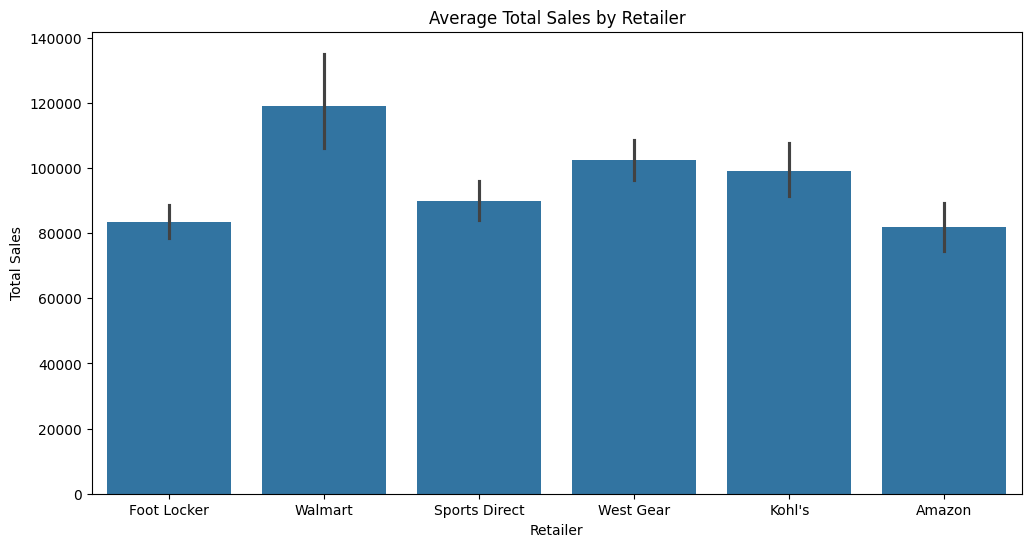

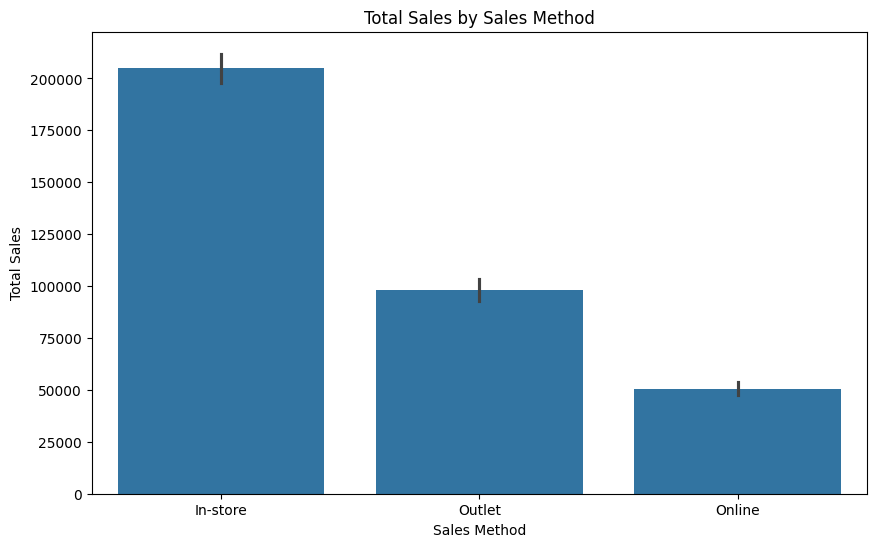

In [11]:
# Barplot for Average Total Sales by Retailer
plt.figure(figsize=(12, 6))
sns.barplot(x='Retailer', y='Total Sales', data=df)
plt.title('Average Total Sales by Retailer')
plt.show()

# Boxplot for Total Sales by Sales Method
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Method', y='Total Sales', data=df)
plt.title('Total Sales by Sales Method')
plt.show()


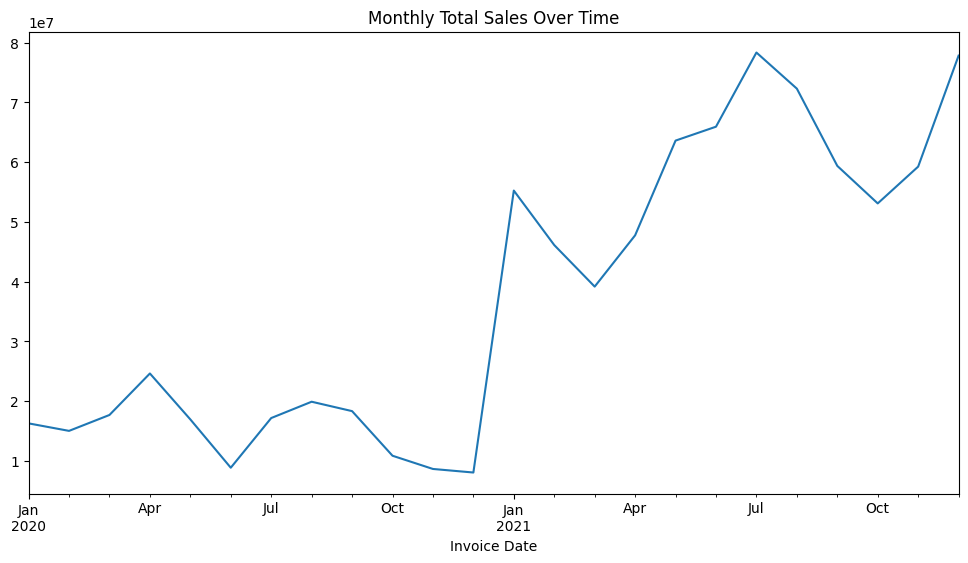

In [12]:
# Convert 'Invoice Date' to datetime format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Set 'Invoice Date' as the index
df.set_index('Invoice Date', inplace=True)

# Resample data to monthly or weekly frequency
monthly_sales = df['Total Sales'].resample('M').sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Total Sales Over Time')
plt.show()


In [13]:
#kpis

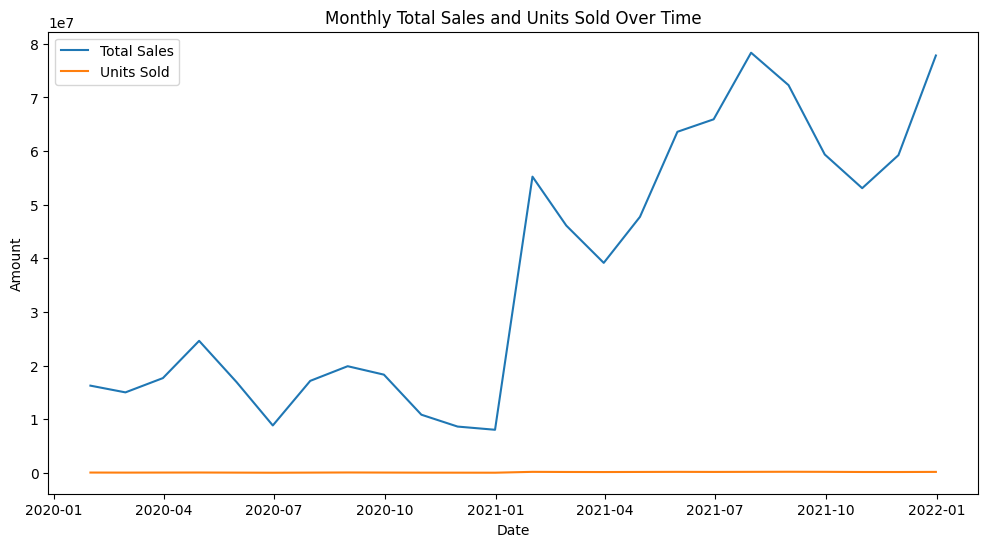

In [14]:
# Calculate monthly total sales and units sold
monthly_sales = df['Total Sales'].resample('M').sum()
monthly_units_sold = df['Units Sold'].resample('M').sum()

# Plotting KPIs over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Total Sales')
plt.plot(monthly_units_sold.index, monthly_units_sold, label='Units Sold')
plt.title('Monthly Total Sales and Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


In [16]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx", sheet_name="Data Sales Adidas", skiprows=range(4), usecols="B:N")

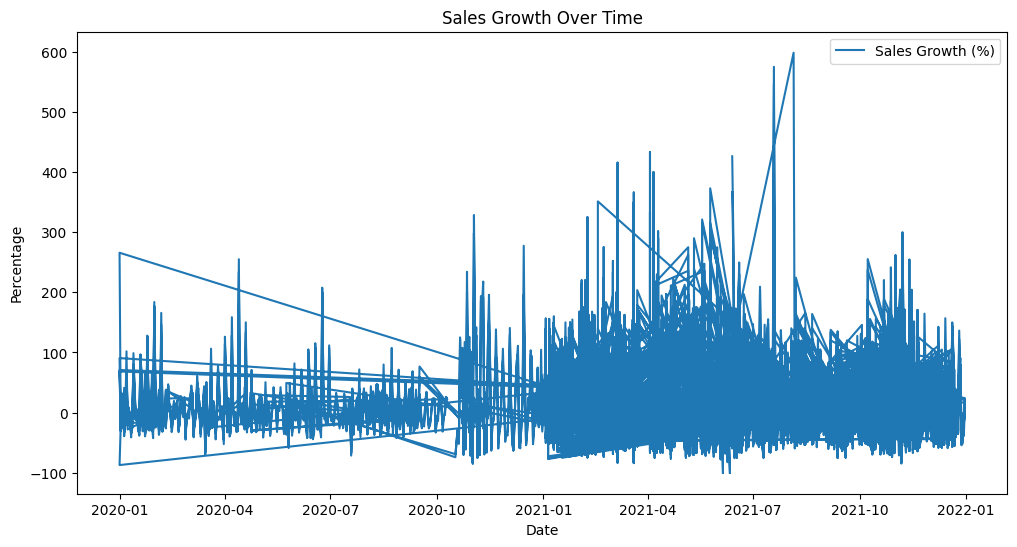

In [17]:
# Convert 'Invoice Date' to datetime format if not already
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Set 'Invoice Date' as the index
df.set_index('Invoice Date', inplace=True)

# KPI 1: Profit Margin
df['Profit Margin'] = (df['Operating Profit'] / df['Total Sales']) * 100

# KPI 2: Average Price per Unit
df['Average Price per Unit'] = df['Total Sales'] / df['Units Sold']

# KPI 3: Sales Growth
df['Sales Growth'] = df['Total Sales'].pct_change() * 100

# KPI 4: Units Sold Growth
df['Units Sold Growth'] = df['Units Sold'].pct_change() * 100

# KPI 5: Average Operating Margin
average_operating_margin = df['Operating Margin'].mean()

# KPI 6: Region-wise Sales
region_sales = df.groupby('Region')['Total Sales'].sum()

# KPI 7: Product-wise Sales
product_sales = df.groupby('Product')['Total Sales'].sum()

# KPI 8: Average Sales per Transaction
df['Transaction Date'] = df.index.date
average_sales_per_transaction = df.groupby('Transaction Date')['Total Sales'].mean()

# KPI 9: Sales by Sales Method
sales_by_method = df.groupby('Sales Method')['Total Sales'].sum()

# Visualize KPIs as needed (some are not visualized due to their nature)
# Example: Sales Growth over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales Growth'], label='Sales Growth (%)')
plt.title('Sales Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

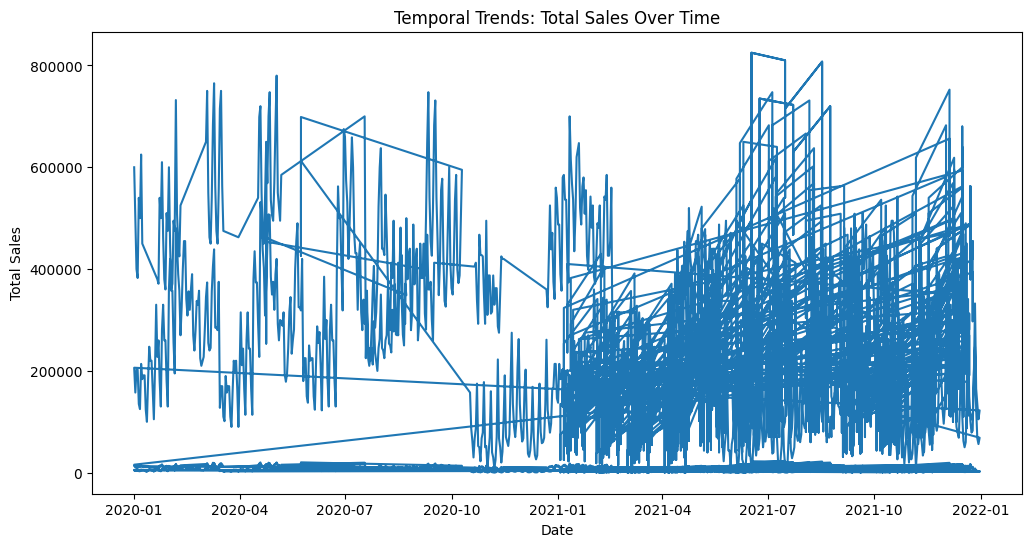

In [18]:
# Plotting total sales over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Sales'])
plt.title('Temporal Trends: Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()



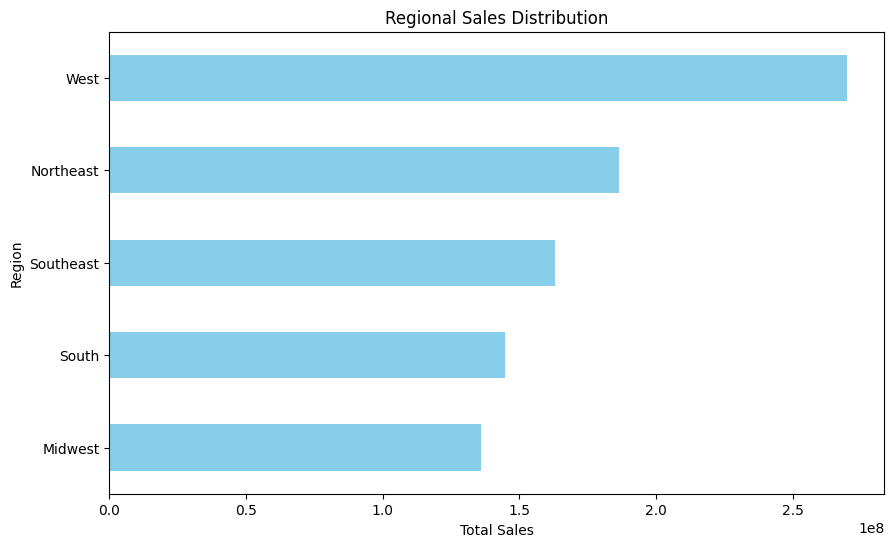

In [19]:
# Group by region and calculate total sales
regional_sales = df.groupby('Region')['Total Sales'].sum()

# Plotting regional sales
plt.figure(figsize=(10, 6))
regional_sales.sort_values().plot(kind='barh', color='skyblue')
plt.title('Regional Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()


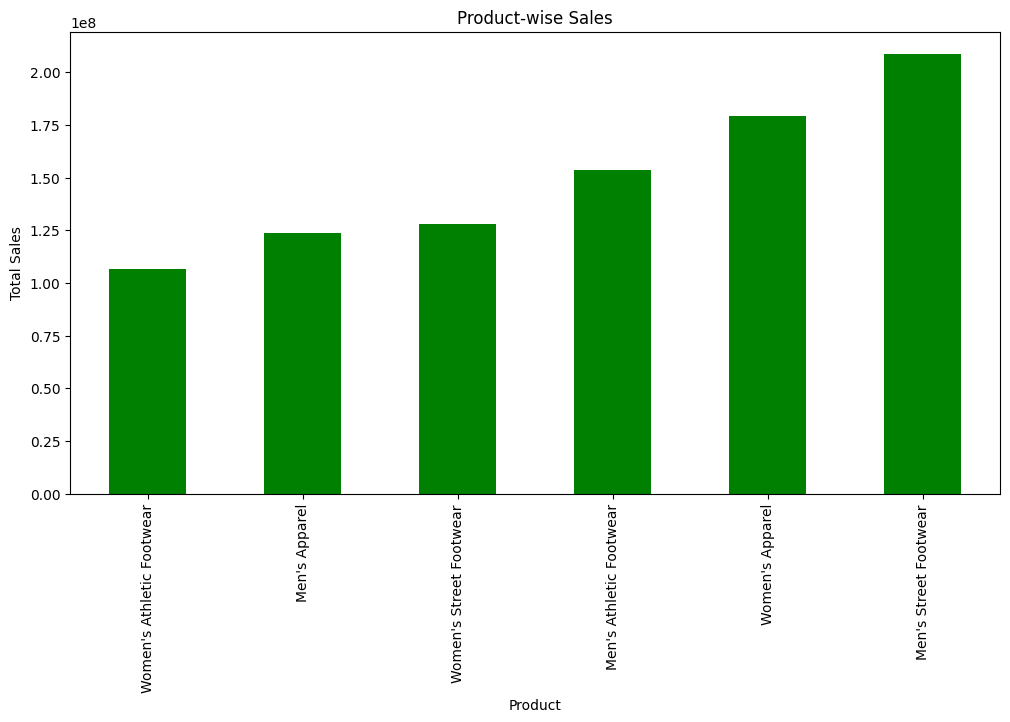

In [20]:
# Group by product and calculate total sales
product_sales = df.groupby('Product')['Total Sales'].sum()

# Plotting product-wise sales
plt.figure(figsize=(12, 6))
product_sales.sort_values().plot(kind='bar', color='green')
plt.title('Product-wise Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


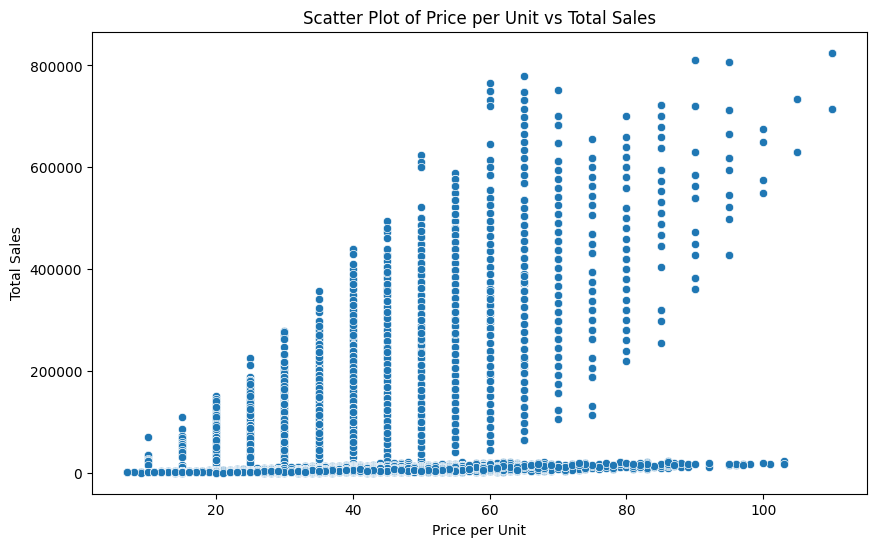

In [21]:
# Scatter plot for Price per Unit vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Total Sales', data=df)
plt.title('Scatter Plot of Price per Unit vs Total Sales')
plt.show()


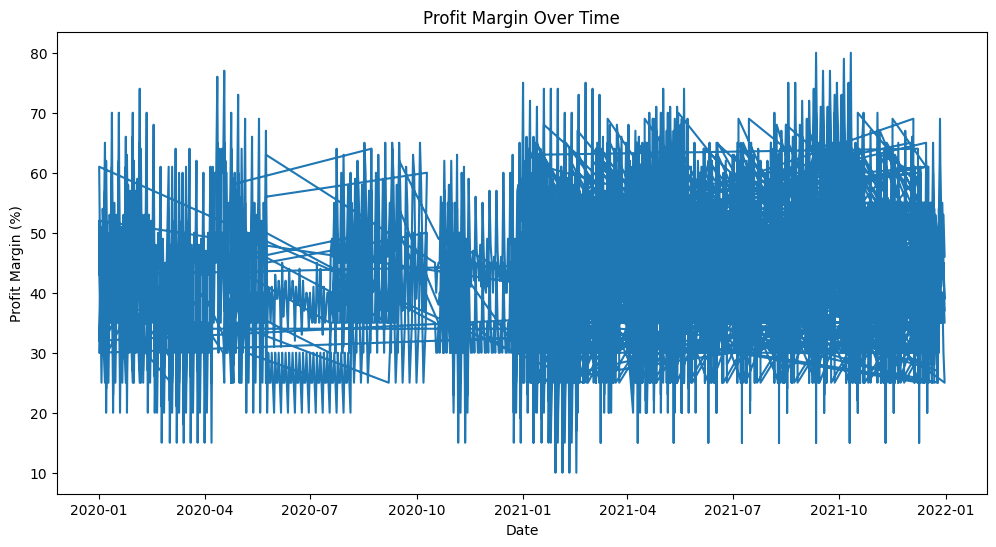

In [22]:
# Calculate and plot profit margin over time
df['Profit Margin'] = (df['Operating Profit'] / df['Total Sales']) * 100

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Profit Margin'])
plt.title('Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Margin (%)')
plt.show()
